In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [6]:
  # Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat =  city_weather ["coord"]["lat"]
        city_lng =  city_weather ["coord"]["lon"]
        city_max_temp =  city_weather ["main"]["temp_max"]
        city_humidity =  city_weather ["main"]["humidity"]
        city_clouds =  city_weather ["clouds"]["all"]
        city_wind =  city_weather ["wind"]["speed"]
        city_country =  city_weather ["sys"]["country"]
        city_date =  city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Windspeed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as E:
        print (E)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kharkhorin
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | sitia
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | mosfellsbaer
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | minas de marcona
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | tobelo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | lakhipur
Processing Record 22 of Set 1 | poronaysk
Processing Record 23 of Set 1 | gry

Processing Record 37 of Set 4 | praia da vitoria
Processing Record 38 of Set 4 | ust-nera
Processing Record 39 of Set 4 | tranovaho
'coord'
City not found. Skipping...
Processing Record 40 of Set 4 | qal'at bishah
'coord'
City not found. Skipping...
Processing Record 41 of Set 4 | ploudalmezeau
Processing Record 42 of Set 4 | taro
Processing Record 43 of Set 4 | khairpur
Processing Record 44 of Set 4 | st. john's
Processing Record 45 of Set 4 | xining
Processing Record 46 of Set 4 | tolanaro
Processing Record 47 of Set 4 | vadso
Processing Record 48 of Set 4 | balimila
Processing Record 49 of Set 4 | iskateley
Processing Record 0 of Set 5 | vanimo
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | kon tum
Processing Record 3 of Set 5 | fuvahmulah
'coord'
City not found. Skipping...
Processing Record 4 of Set 5 | pimentel
Processing Record 5 of Set 5 | salinopolis
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | beau vallon
Processing Record

Processing Record 27 of Set 8 | snovsk
Processing Record 28 of Set 8 | goaso
'coord'
City not found. Skipping...
Processing Record 29 of Set 8 | bargara
'coord'
City not found. Skipping...
Processing Record 30 of Set 8 | matoury
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | barentu
Processing Record 33 of Set 8 | ohara
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | morden
Processing Record 36 of Set 8 | mata-utu
Processing Record 37 of Set 8 | celso ramos
Processing Record 38 of Set 8 | novomyshastovskaya
Processing Record 39 of Set 8 | turuntayevo
Processing Record 40 of Set 8 | kolonia
Processing Record 41 of Set 8 | mafinga
Processing Record 42 of Set 8 | quitilipi
Processing Record 43 of Set 8 | tugulym
Processing Record 44 of Set 8 | keflavik
Processing Record 45 of Set 8 | kitui
Processing Record 46 of Set 8 | marsh harbour
Processing Record 47 of Set 8 | lumphat
Processing Record 48 of Set 8 | emerald
Processing Record 49 of Set 

Processing Record 15 of Set 12 | kuching
Processing Record 16 of Set 12 | oguzeli
Processing Record 17 of Set 12 | almeirim
Processing Record 18 of Set 12 | artvin
Processing Record 19 of Set 12 | kyzylorda
Processing Record 20 of Set 12 | posto fiscal rolim de moura
Processing Record 21 of Set 12 | vila franca do campo
Processing Record 22 of Set 12 | khandyga
Processing Record 23 of Set 12 | san pedro pochutla
Processing Record 24 of Set 12 | rabaul
Processing Record 25 of Set 12 | vrangel'
Processing Record 26 of Set 12 | roscommon
Processing Record 27 of Set 12 | ahau
'coord'
City not found. Skipping...
Processing Record 28 of Set 12 | beipiao
Processing Record 29 of Set 12 | sao tome
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | ciudad lazaro cardenas
Processing Record 32 of Set 12 | revda
Processing Record 33 of Set 12 | ulladulla
Processing Record 34 of Set 12 | tirat karmel
Processing Record 35 of Set 12 | rikaze
Processing Record 36 of Set 12 | acaju

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df ["Lat"]
max_temps = city_data_df ["Max Temp"]
humidity = city_data_df ["Humidity"]
cloudiness = city_data_df ["Cloudiness"]
wind_speed = city_data_df ["Wind Speed"]

city_data_df.to_csv("output_data_file", index_label="City_ID")

city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [25]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kharkhorin,47.1975,102.8238,67.23,63,0,2.15,MN,1691630091
1,kingston,17.9970,-76.7936,84.24,89,17,1.59,JM,1691629796
2,geraldton,-28.7667,114.6000,54.01,87,100,4.61,AU,1691629840
3,sitia,35.2000,26.0986,78.98,70,0,21.41,GR,1691629843
4,ushuaia,-54.8000,-68.3000,40.66,75,40,2.30,AR,1691630022


# Plotting Data

Text(0.5, 0, 'Latitude')

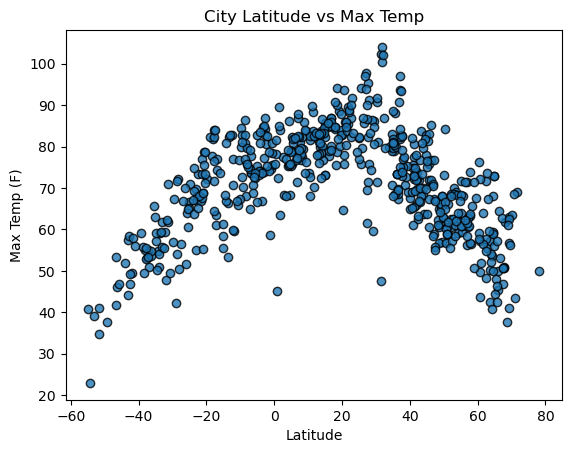

In [30]:
#City Lat VS Max Temp
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title ("City Latitude vs Max Temp")
plt.ylabel ("Max Temp (F)")
plt.xlabel ("Latitude")



Text(0.5, 0, 'Latitude')

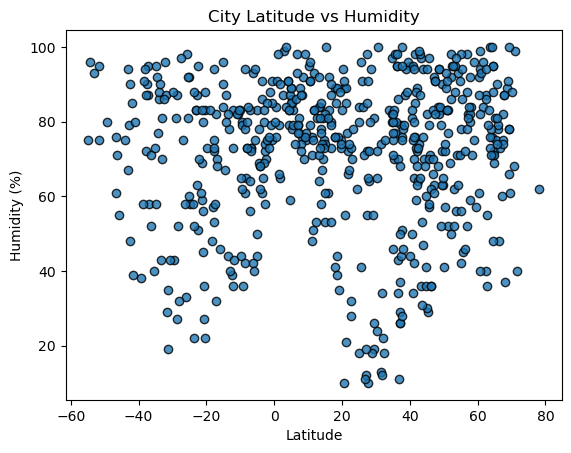

In [33]:
#City Lat vs Humidity 
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title ("City Latitude vs Humidity")
plt.ylabel ("Humidity (%)")
plt.xlabel ("Latitude")

Text(0.5, 0, 'Latitude')

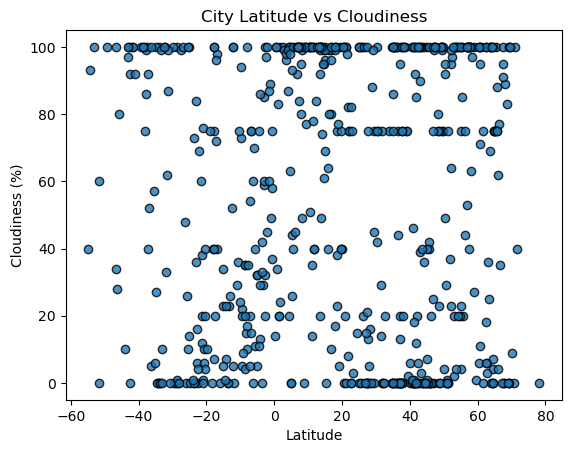

In [35]:
#City Lat vs Cloudiness

plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs Cloudiness")
plt.ylabel ("Cloudiness (%)")
plt.xlabel ("Latitude")

Text(0.5, 0, 'Latitude')

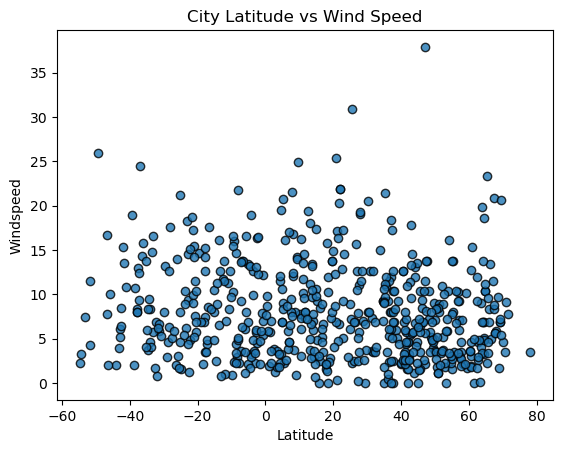

In [36]:
#Latitude vs Windspeed

plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title ("City Latitude vs Wind Speed")
plt.ylabel ("Windspeed")
plt.xlabel ("Latitude")

# Compute Linear Regression for Each Relationship

In [41]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
plt.show()

In [47]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kharkhorin,47.1975,102.8238,67.23,63,0,2.15,MN,1691630091
1,kingston,17.9970,-76.7936,84.24,89,17,1.59,JM,1691629796
3,sitia,35.2000,26.0986,78.98,70,0,21.41,GR,1691629843
6,mosfellsbaer,64.1667,-21.7000,53.62,76,0,6.91,IS,1691630093
7,constantia,44.1833,28.6500,63.70,70,36,13.11,RO,1691630093


In [48]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,geraldton,-28.7667,114.6000,54.01,87,100,4.61,AU,1691629840
4,ushuaia,-54.8000,-68.3000,40.66,75,40,2.30,AR,1691630022
5,touros,-5.1989,-35.4608,75.42,83,32,13.44,BR,1691630092
11,waitangi,-43.9535,-176.5597,51.82,75,10,1.99,NZ,1691630094
12,minas de marcona,-15.2119,-75.1103,55.62,84,23,10.45,PE,1691630094


The r-squared is: -0.6792335848295037


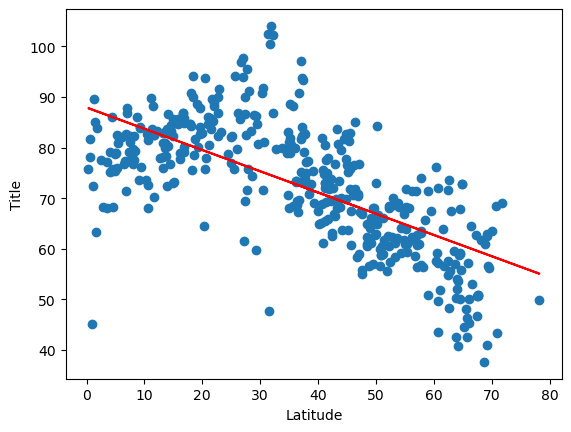

In [43]:
#Northern Hemisphere: Max Temp vs Latitude 

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8114681976751446


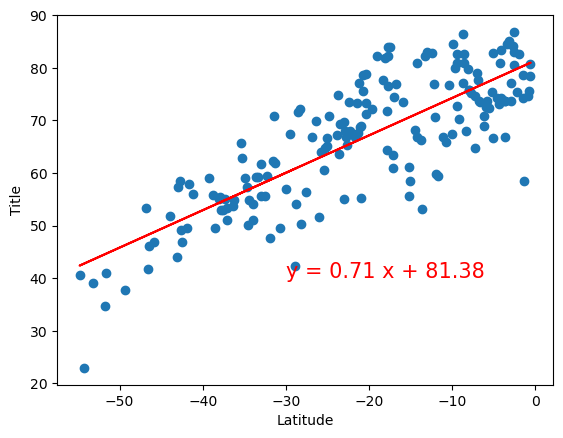

In [44]:
#Southern Hemisphere: Max Temp vs Latitude
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

The r-squared is: -0.02261705484533612


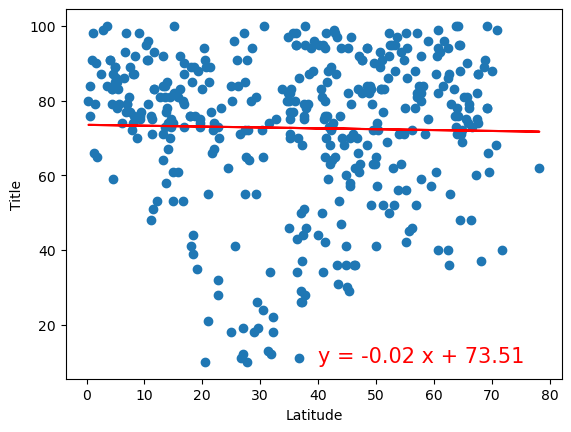

In [45]:
#Northern Hemisphere: Humidity vs Latitude

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.042456252019863


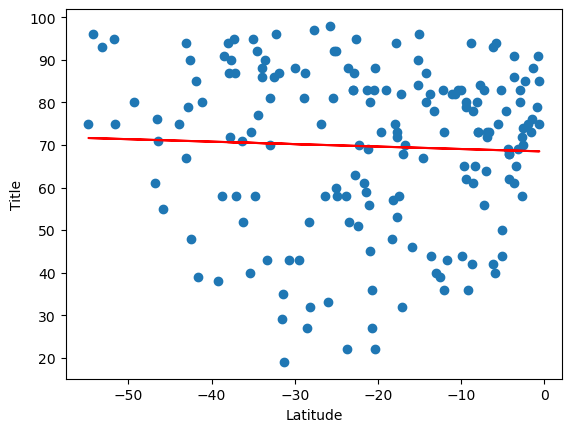

In [46]:
#Southern Hemisphere: Humidity vs Latitude 
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

The r-squared is: -0.15982493123719668


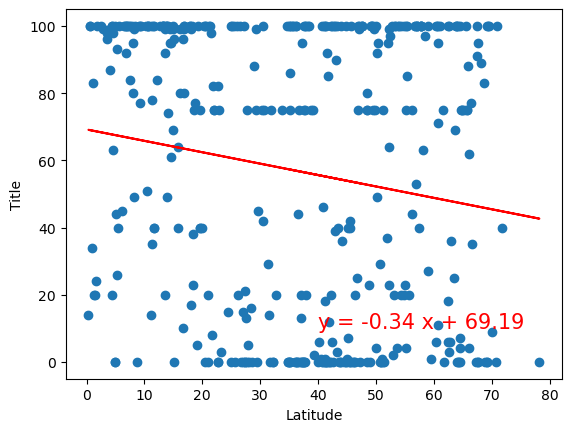

In [49]:
# Northern Hemisphere: Cloudiness vs Latitude

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))


The r-squared is: -0.19971673661438033


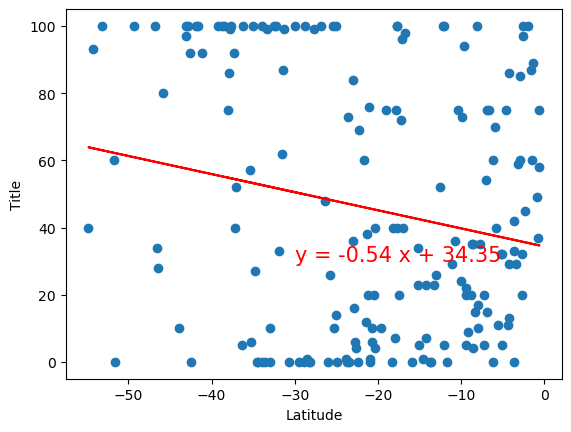

In [50]:
#Southern Hemisphere: Cloudiness vs Latitude
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

The r-squared is: -0.11832637411588938


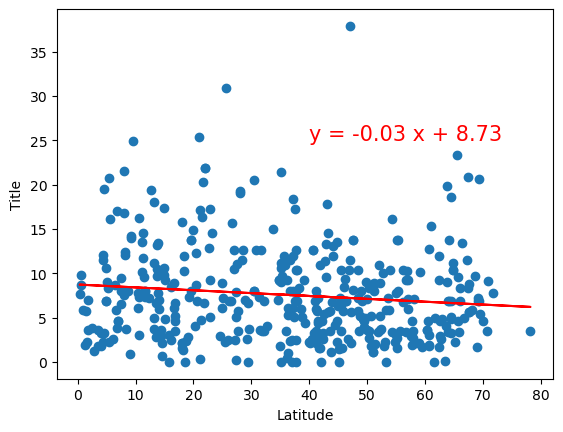

In [55]:
# Northern Hemisphere:  Wind Speed vs Latitude
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))


The r-squared is: -0.046753002690884685


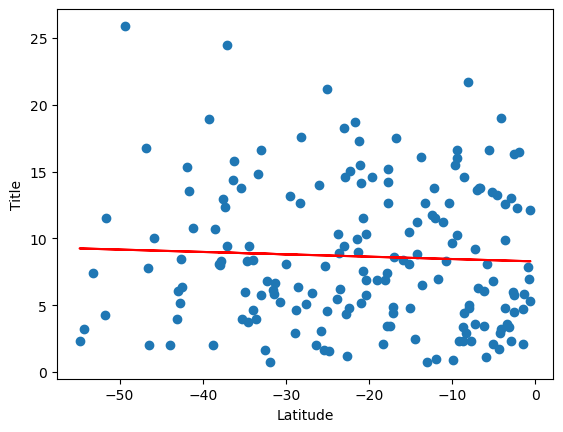

In [57]:
# Southern Hemisphere: Wind Speed vs Latitude
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))